### Evolving Network Analysis - January 2018
#### <i>Abdel K. Bokharouss, Joris Rombouts, Bart van Helvert, Remco Surtel</i>

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import datetime
import tkinter
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

In [2]:
with open("./data/tgraph_real_wikiedithyperlinks.txt") as file:
    peek = file.readlines()[:10]
peek

['1 6 1028243088 1120917090\n',
 '1 8 1029885647 1136791625\n',
 '1 9 1029885647 1136791625\n',
 '1 3 1028243088 1143227562\n',
 '1 3 1146727453 1148998304\n',
 '1 5 1028243088 1184096745\n',
 '1 2 1028243088 1184096745\n',
 '1 3 1149598035 1184096745\n',
 '1 4 1028243088 1184096745\n',
 '1 7 1028243088 1184096745\n']

In [3]:
temp_nw = pd.read_table("./data/tgraph_real_wikiedithyperlinks.txt", header = None, sep = " ",
                       names = ["src", "trg", "start", "end"])

In [4]:
temp_nw.head()

,src,trg,start,end
0,1,6,1028243088,1120917090
1,1,8,1029885647,1136791625
2,1,9,1029885647,1136791625
3,1,3,1028243088,1143227562
4,1,3,1146727453,1148998304


In [5]:
temp_nw['start'] = pd.to_datetime(temp_nw['start'], unit = 's')
temp_nw['end'] = pd.to_datetime(temp_nw['end'], unit = 's')

In [6]:
temp_nw.head(10)

,src,trg,start,end
0,1,6,2002-08-01 23:04:48,2005-07-09 13:51:30
1,1,8,2002-08-20 23:20:47,2006-01-09 07:27:05
2,1,9,2002-08-20 23:20:47,2006-01-09 07:27:05
3,1,3,2002-08-01 23:04:48,2006-03-24 19:12:42
4,1,3,2006-05-04 07:24:13,2006-05-30 14:11:44
5,1,5,2002-08-01 23:04:48,2007-07-10 19:45:45
6,1,2,2002-08-01 23:04:48,2007-07-10 19:45:45
7,1,3,2006-06-06 12:47:15,2007-07-10 19:45:45
8,1,4,2002-08-01 23:04:48,2007-07-10 19:45:45
9,1,7,2002-08-01 23:04:48,2007-07-10 19:45:45


In [7]:
print(
    datetime.datetime.fromtimestamp(
        int("1028243088")
    ).strftime('%Y-%m-%d %H:%M:%S')
)

2002-08-02 01:04:48


In [8]:
static_nw = temp_nw.copy()
static_nw.drop(['start', 'end'], axis = 1, inplace = True)
static_nw.head()

,src,trg
0,1,6
1,1,8
2,1,9
3,1,3
4,1,3


## Static Network Analysis

In this analysis we ignore the time information of each edge. Therefore, we first create a graph $G_{static}$, based only on the pairs of source node and target node. In this paragraph we treat two measures: clustering coefficient and the largest connected component (LCC). 

### Clustering coefficient
A clustering coefficient is a measure of the degree to which nodes in a graph tend to cluster together. 

The clustering coefficient is trying to capture cliquishness. In other words, the local clustering coefficient of a node in a graph quentifies how close its neighbours are to be being a clique. Let $G = (V,E)$ a graph. A clique is a subset of nodes of a graph such that every two distinct nodes in the clique are adjacent. More formal: a clique is a subset $C \subseteq V$ such that $(u,v)$ in $E$ for all pairs $u,v$ in $C$.  

The clustering coefficient catches the likeness that two nodes that are connected are part of some of larger highlty connected group of nodes. 

The clustering coefficient represents the fraction of possible interconnectors between the neighbors of a node $u$. The clustering coefficient is a value between zero and one. The coefficient equals zero, if $u$ is the centere of a "star", where his neighbors are not connected to eachother. When the clustering coefficient is one, we have a clique. This means that $u$ is connected to its neighbors, and all its neighbors are connected to each other. 

For unweighted undirected graphs, the clustering of a node $u$ is:

$$c_u = \frac{2 \cdot N_u}{k_u (k_u - 1)}$$, 

where $k_u$ is the degree of node $u$ and $N_u$ is the number of links between the neighbors of $u$. 
Note that in this measure we will read and create a static graph $G_static$ as an undirected graph. The clustering coefficient that we calculate is just two times the clustering coeffecient for each node times two. This is because in an undirected graph, a directed edge is considered as two directed edges, one from the node to another node and one node the other way around. First, we open the graph as an undirected graph.

In [9]:
#np.savetxt(r'./data/tgraph_real_wikiedithyperlinks_NoTime.txt', static_nw.values, fmt='%d')

In [10]:
fh = open("data/tgraph_real_wikiedithyperlinks_NoTime.txt", 'rb')
G_static = nx.read_edgelist(fh,create_using=nx.Graph())
fh.close()

In [11]:
#G_static = nx.from_pandas_dataframe(static_nw, 'src', 'trg')

The <i>NetworkX</i> library is used for calculating the cluster coefficient for each node. After that we store the results of each node in a dataframe, which is later saved as a csv file, to prevent that we have to run this time-consuming processing again.  

In [12]:
#cluster_score = nx.clustering(G_static)

In [13]:
#df_cluster_score = pd.DataFrame(list(cluster_score.items()), columns=['Node', 'Cluster Coefficient'])
df_cluster_score = pd.read_csv('data/cluster_score.csv')

In [14]:
df_cluster_score.sort_values(by=['Cluster Coefficient'], inplace = True, ascending = False)
df_cluster_score.head()

,Node,Cluster Coefficient
233690,153477,1.0
644700,977681,1.0
131774,312446,1.0
580493,899623,1.0
580484,899605,1.0


In [15]:
df_cluster_score.loc[df_cluster_score['Cluster Coefficient'] == 1.0].count()#number of nodes with coefficient of 1, i.e. that are a clique

Node                   28638
Cluster Coefficient    28638
dtype: int64

In [16]:
#df_cluster_score.to_csv('data/cluster_score.csv')

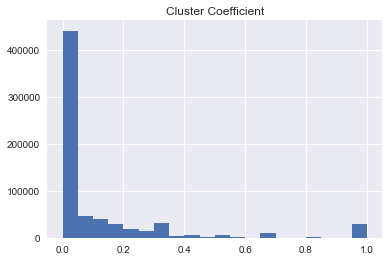

In [17]:
df_cluster_score.hist(column='Cluster Coefficient', bins = 20);
plt.show()

Note that the clustering coefficient of a graph is just the average of the clustering coefficient of all nodes. 

In [18]:
#nx.average_clustering(G_static)

### Largest connected component (LCC)



In [19]:
#G_bfs = nx.bfs_tree(G_static, 1)

In [20]:
#nx.draw(G_bfs)
#nx.draw(G_bfs,pos=nx.spring_layout(G))
#plt.show()